## Breast Cancer - Preprocessing

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [6]:
proteomes = pd.read_csv( '77_cancer_proteomes_CPTAC_itraq.csv')
clinical = pd.read_csv( 'clinical_data_breast_cancer.csv')
proteins = pd.read_csv( 'PAM50_proteins.csv')

In [7]:
proteins.head(3)

,GeneSymbol,RefSeqProteinID,Species,Gene Name
0,MIA,NP_006524,Homo sapiens,melanoma inhibitory activity
1,FGFR4,NP_002002,Homo sapiens,fibroblast growth factor receptor 4
2,FGFR4,NP_998812,Homo sapiens,fibroblast growth factor receptor 4


In [8]:
proteins.nunique(axis=0).sort_values()

Species              1
GeneSymbol          50
Gene Name           50
RefSeqProteinID    100
dtype: int64

In [9]:
proteins = proteins.drop(['Species'], axis=1)

In [10]:
proteins.head(3)

,GeneSymbol,RefSeqProteinID,Gene Name
0,MIA,NP_006524,melanoma inhibitory activity
1,FGFR4,NP_002002,fibroblast growth factor receptor 4
2,FGFR4,NP_998812,fibroblast growth factor receptor 4


In [11]:
for col in clinical:
    print(f'{col = }')
    print(clinical[col].unique())
    

col = 'Complete TCGA ID'
['TCGA-A2-A0T2' 'TCGA-A2-A0CM' 'TCGA-BH-A18V' 'TCGA-BH-A18Q'
 'TCGA-BH-A0E0' 'TCGA-A7-A0CE' 'TCGA-D8-A142' 'TCGA-A2-A0D0'
 'TCGA-AO-A0J6' 'TCGA-A2-A0YM' 'TCGA-A2-A0D2' 'TCGA-A2-A0SX'
 'TCGA-AO-A0JL' 'TCGA-AO-A12F' 'TCGA-AN-A0AL' 'TCGA-AN-A0FL'
 'TCGA-AR-A0U4' 'TCGA-AR-A1AQ' 'TCGA-BH-A0AV' 'TCGA-C8-A12V'
 'TCGA-C8-A131' 'TCGA-C8-A134' 'TCGA-E2-A150' 'TCGA-E2-A158'
 'TCGA-E2-A159' 'TCGA-BH-A18R' 'TCGA-A2-A0T1' 'TCGA-BH-A0EE'
 'TCGA-A2-A0D1' 'TCGA-AO-A12D' 'TCGA-AO-A0JE' 'TCGA-A2-A0EQ'
 'TCGA-A8-A076' 'TCGA-A8-A09G' 'TCGA-AR-A0TX' 'TCGA-C8-A12L'
 'TCGA-C8-A12P' 'TCGA-C8-A12Q' 'TCGA-C8-A12T' 'TCGA-C8-A12Z'
 'TCGA-C8-A130' 'TCGA-C8-A135' 'TCGA-C8-A138' 'TCGA-AR-A0TR'
 'TCGA-BH-A18N' 'TCGA-BH-A0HK' 'TCGA-A7-A0CD' 'TCGA-BH-A0HP'
 'TCGA-A2-A0YI' 'TCGA-A2-A0YL' 'TCGA-A2-A0YF' 'TCGA-BH-A0E1'
 'TCGA-A2-A0T6' 'TCGA-A2-A0T7' 'TCGA-A2-A0YD' 'TCGA-A2-A0EV'
 'TCGA-A2-A0YC' 'TCGA-AO-A0J9' 'TCGA-BH-A0BV' 'TCGA-AO-A12E'
 'TCGA-AO-A126' 'TCGA-A2-A0EX' 'TCGA-AO-A0JJ' 'TCGA-A8-A08Z'

In [12]:
clinical = clinical.drop(['Node-Coded', 'Tumor--T1 Coded', 'Metastasis', 'OS Time', 'OS event', 'SigClust Unsupervised mRNA',
                         'SigClust Intrinsic mRNA', 'miRNA Clusters', 'methylation Clusters','RPPA Clusters', 'CN Clusters',
                         'Integrated Clusters (with PAM50)', 'Integrated Clusters (no exp)', 'Integrated Clusters (unsup exp)'],
                         axis=1) # dropped some clusters that were already made idk if correctly
clinical['Gender'] = clinical['Gender'].replace({'FEMALE': 0, 'MALE': 1})
clinical['Survival Data Form'] = clinical['Survival Data Form'].replace({'enrollment': 0, 'followup': 1})
clinical['Vital Status'] = clinical['Vital Status'].replace({'DECEASED': 0, 'LIVING': 1})
clinical = clinical.rename(columns={'Age at Initial Pathologic Diagnosis': 'diagnosis_age', 
                                    'Metastasis-Coded' : 'spread_other_parts',
                                   'PAM50 mRNA' : 'cancer_type',
                                   'Converted Stage' : 'converted_stage',
                                    'Tumor': 'tumor_size',
                                   'Node': 'spread_lymph_nodes', 
                                   'Complete TCGA ID': 'Complete.TCGA.ID', 
                                   'AJCC Stage' : 'AJCC_stage',
                                   'Converted Stage': 'converted_stage', 
                                   'Gender': 'gender'})
clinical['PR Status'] = clinical['PR Status'].replace({'Negative': 0, 'Positive': 1})
clinical['tumor_size'] = clinical['tumor_size'].replace({'T4': 4, 'T1': 1, 'T2':2, 'T3':3})
clinical['spread_lymph_nodes'] = clinical['spread_lymph_nodes'].replace({'N0': 0, 'N1': 1, 'N2':2, 'N3':3})
clinical['spread_other_parts'] = clinical['spread_other_parts'].replace({'Negative': 0, 'Positive': 1})
clinical['ER Status'] = clinical['ER Status'].replace({'Negative': 0, 'Positive': 1})
clinical['PR Status'] = clinical['PR Status'].replace({'Negative': 0, 'Positive': 1})
clinical['HER2 Final Status'] = clinical['HER2 Final Status'].replace({'Negative': 0, 'Positive': 1})
clinical.drop(labels = ['Days to Date of Last Contact', 'Days to date of Death'], axis = 1, inplace = True)
def restructure_stage(stage):
    return stage[6:]

clinical['AJCC_stage'] = clinical['AJCC_stage'].apply(restructure_stage)

def restructure_con_stage(stage):
    if stage == 'No_Conversion':
        return 0
    else:
        return stage[6:]
    
clinical['converted_stage'] = clinical['converted_stage'].apply(restructure_con_stage)

In [13]:
clinical

,Complete.TCGA.ID,gender,diagnosis_age,ER Status,PR Status,HER2 Final Status,tumor_size,spread_lymph_nodes,spread_other_parts,AJCC_stage,converted_stage,Survival Data Form,Vital Status,cancer_type
0,TCGA-A2-A0T2,0,66,0,0,0,3,3,1,IV,0,1,0,Basal-like
1,TCGA-A2-A0CM,0,40,0,0,0,2,0,0,IIA,IIA,1,0,Basal-like
2,TCGA-BH-A18V,0,48,0,0,0,2,1,0,IIB,0,0,0,Basal-like
3,TCGA-BH-A18Q,0,56,0,0,0,2,1,0,IIB,0,0,0,Basal-like
4,TCGA-BH-A0E0,0,38,0,0,0,3,3,0,IIIC,0,1,1,Basal-like
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,TCGA-BH-A0C7,0,48,1,0,1,2,1,0,IIB,IIB,0,1,Luminal B
101,TCGA-BH-A0DD,1,58,1,1,1,2,1,0,IIB,IIB,0,1,Luminal B
102,TCGA-C8-A12U,0,46,1,1,0,2,1,0,IB,IIB,0,1,Luminal B
103,TCGA-C8-A12W,0,49,1,1,0,4,1,0,IIIB,IIIB,0,1,Luminal B


<AxesSubplot:>

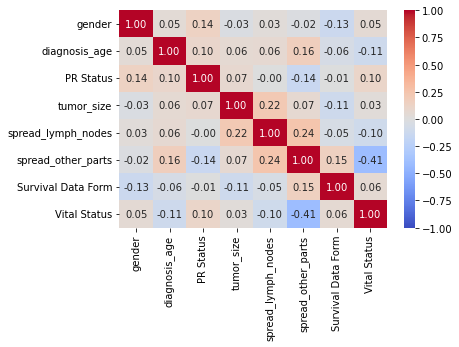

In [14]:
sns.heatmap(clinical.corr(), cmap='coolwarm', annot=True, fmt='.2f', vmin=-1, vmax=1)

In [15]:
proteomes.head(3)

,RefSeq_accession_number,gene_symbol,gene_name,AO-A12D.01TCGA,C8-A131.01TCGA,AO-A12B.01TCGA,BH-A18Q.02TCGA,C8-A130.02TCGA,C8-A138.03TCGA,E2-A154.03TCGA,...,AO-A12B.34TCGA,A2-A0SW.35TCGA,AO-A0JL.35TCGA,BH-A0BV.35TCGA,A2-A0YM.36TCGA,BH-A0C7.36TCGA,A2-A0SX.36TCGA,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC
0,NP_958782,PLEC,plectin isoform 1,1.096131,2.609943,-0.659828,0.195341,-0.494060,2.765081,0.862659,...,-0.963904,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.398560,0.598585,-0.191285,0.566975
1,NP_958785,NaN,plectin isoform 1g,1.111370,2.650422,-0.648742,0.215413,-0.503899,2.779709,0.870186,...,-0.938210,-0.487772,-0.10668,-0.055893,0.658143,-0.547749,-0.392601,0.606697,-0.183918,0.578702
2,NP_958786,PLEC,plectin isoform 1a,1.111370,2.650422,-0.654285,0.215413,-0.500619,2.779709,0.870186,...,-0.943919,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747


In [16]:
# reformating columnnames in proteomes df to fit column Complete TCGA ID in clinical df
n = proteomes['RefSeq_accession_number']
proteomes = proteomes.iloc[:, 3:86].transpose()
proteomes.columns = n
proteomes.insert(0, 'Complete.TCGA.ID', proteomes.index)
proteomes = proteomes.reset_index(drop=True)

def restructure(proteome):
    x = proteome[3:7]
    y = proteome[0:2]
    return "TCGA" + "-" + y + "-" + x

proteomes['Complete.TCGA.ID'] = proteomes['Complete.TCGA.ID'].apply(restructure)

RefSeq_accession_number
NP_065785           0.759036
NP_620138           0.759036
NP_003836           0.746988
NP_001139020        0.746988
NP_001181887        0.746988
                      ...   
NP_001121188        0.000000
NP_006796           0.000000
NP_001139443        0.000000
NP_057390           0.000000
Complete.TCGA.ID    0.000000
Length: 12554, dtype: float64


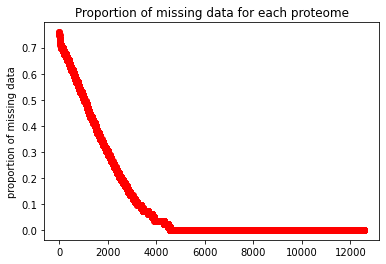

In [17]:
na_counts = proteomes.isna().sum() / len(proteomes)
print(na_counts.sort_values(ascending=False))

plt.plot(na_counts.sort_values(ascending=False).values, color='red', linestyle='-', marker='o')
plt.ylabel("proportion of missing data")
plt.title("Proportion of missing data for each proteome")
plt.show()

In [18]:
count = len(na_counts[na_counts > 0.2])
count
# 2.5k proteomes have more than 20% of missing values 
# from 12k proteomes 2.5k is not a great loss so we can delete them 
# the rest will be replaced with mean for each column

2533

In [19]:
proteomes = proteomes.loc[:, (proteomes.isna().sum() / len(proteomes) < 0.2)]

In [20]:
num_cols = proteomes.select_dtypes(include='number').columns
imputer = SimpleImputer(strategy='mean')
proteomes[num_cols] = imputer.fit_transform(proteomes[num_cols])

In [21]:
proteomes

RefSeq_accession_number,Complete.TCGA.ID,NP_958782,NP_958785,NP_958786,NP_000436,NP_958781,NP_958780,NP_958783,NP_958784,NP_112598,...,NP_002460,NP_001092808,NP_000610,NP_699178,NP_006140,NP_068835,NP_612382,NP_848561,NP_665813,NP_001193600
0,TCGA-AO-A12D,1.096131,1.111370,1.111370,1.107561,1.115180,1.107561,1.111370,1.111370,-1.517390,...,1.096131,1.259953,-2.472722,-0.294445,0.660707,0.547520,2.936264,-0.100145,0.840875,-1.072555
1,TCGA-C8-A131,2.609943,2.650422,2.650422,2.646374,2.646374,2.646374,2.650422,2.650422,3.909313,...,0.666960,0.561715,-2.472722,1.205328,0.660707,0.274316,-0.324771,0.007156,1.468441,-1.072555
2,TCGA-AO-A12B,-0.659828,-0.648742,-0.654285,-0.632113,-0.640428,-0.654285,-0.648742,-0.648742,-0.618256,...,-1.427526,-1.571643,-2.472722,-2.580459,0.660707,4.023963,-3.012809,-0.593313,-0.837202,-1.072555
3,TCGA-BH-A18Q,0.195341,0.215413,0.215413,0.205377,0.215413,0.215413,0.215413,0.215413,-1.035760,...,0.097702,0.275630,-9.750480,1.292626,-1.554294,-0.002037,-4.240636,-2.598053,0.331200,0.048144
4,TCGA-C8-A130,-0.494060,-0.503899,-0.500619,-0.510459,-0.503899,-0.503899,-0.500619,-0.500619,-1.845366,...,0.097702,-0.090636,0.745731,-0.933562,2.753011,1.165554,-2.409503,0.598137,0.331200,1.457462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,TCGA-BH-A0C7,-0.552212,-0.547749,-0.552212,-0.552212,-0.556675,-0.547749,-0.552212,-0.552212,0.679466,...,-5.724365,0.243330,-6.186244,-2.928546,-3.946019,0.097491,-1.475970,-0.400998,-2.399728,-1.072555
79,TCGA-A2-A0SX,-0.398560,-0.392601,-0.392601,-0.392601,-0.395581,-0.392601,-0.392601,-0.392601,-2.504862,...,0.501162,0.243330,-1.480013,-0.711377,3.674021,0.097491,-2.591259,-0.400998,-1.214864,-1.072555
80,TCGA-26-d3f-,0.598585,0.606697,0.603993,0.603993,0.603993,0.606697,0.603993,0.603993,-0.602132,...,-0.429056,0.368718,-5.048028,-0.915833,3.584150,-2.865645,-0.759880,-0.400998,0.331200,-2.162522
81,TCGA-bl-db9-,-0.191285,-0.183918,-0.186022,-0.186022,-0.167079,-0.183918,-0.186022,-0.186022,-0.340726,...,-2.858083,-2.257159,-4.890281,-0.167079,-1.469959,-1.232115,-0.759880,-0.400998,0.331200,-4.357763


In [22]:
data = pd.merge(clinical, proteomes, on='Complete.TCGA.ID', how='inner')

In [23]:
data.head()

,Complete.TCGA.ID,gender,diagnosis_age,ER Status,PR Status,HER2 Final Status,tumor_size,spread_lymph_nodes,spread_other_parts,AJCC_stage,...,NP_002460,NP_001092808,NP_000610,NP_699178,NP_006140,NP_068835,NP_612382,NP_848561,NP_665813,NP_001193600
0,TCGA-A2-A0CM,0,40,0,0,0,2,0,0,IIA,...,0.097702,1.212390,-0.381916,1.557701,3.335683,-0.910903,-0.954985,-0.841106,-1.101926,-1.072555
1,TCGA-BH-A18Q,0,56,0,0,0,2,1,0,IIB,...,0.097702,0.275630,-9.750480,1.292626,-1.554294,-0.002037,-4.240636,-2.598053,0.331200,0.048144
2,TCGA-A7-A0CE,0,57,0,0,0,2,0,0,IIA,...,-0.154193,0.704317,-2.472722,1.111478,0.133029,0.524408,-3.894392,-1.239956,1.401856,0.644347
3,TCGA-D8-A142,0,74,0,0,0,3,0,0,IIB,...,1.514576,0.957906,-6.539066,3.195430,1.688083,1.474814,-0.354245,-1.138644,1.424207,-5.107629
4,TCGA-AO-A0J6,0,61,0,0,0,2,0,0,IIA,...,-1.780255,-0.905087,-3.059128,-0.241654,4.232992,-2.881272,1.000519,-0.577605,0.413310,-1.043420


In [24]:
# idk if columns 'Days to Date of Last Contact', 'Days to date of Death' are influencial... maybe can be dropped or categorized and ohe

### One Hot Encoding

In [25]:
def change_age(age):
    if age < 40:
        return "young"
    elif age < 60:
        return "middle" 
    else:
        return "elderly"

data.diagnosis_age = data.diagnosis_age.apply(change_age)
data.diagnosis_age.value_counts()

elderly    39
middle     36
young       5
Name: diagnosis_age, dtype: int64

In [26]:
data.head()

,Complete.TCGA.ID,gender,diagnosis_age,ER Status,PR Status,HER2 Final Status,tumor_size,spread_lymph_nodes,spread_other_parts,AJCC_stage,...,NP_002460,NP_001092808,NP_000610,NP_699178,NP_006140,NP_068835,NP_612382,NP_848561,NP_665813,NP_001193600
0,TCGA-A2-A0CM,0,middle,0,0,0,2,0,0,IIA,...,0.097702,1.212390,-0.381916,1.557701,3.335683,-0.910903,-0.954985,-0.841106,-1.101926,-1.072555
1,TCGA-BH-A18Q,0,middle,0,0,0,2,1,0,IIB,...,0.097702,0.275630,-9.750480,1.292626,-1.554294,-0.002037,-4.240636,-2.598053,0.331200,0.048144
2,TCGA-A7-A0CE,0,middle,0,0,0,2,0,0,IIA,...,-0.154193,0.704317,-2.472722,1.111478,0.133029,0.524408,-3.894392,-1.239956,1.401856,0.644347
3,TCGA-D8-A142,0,elderly,0,0,0,3,0,0,IIB,...,1.514576,0.957906,-6.539066,3.195430,1.688083,1.474814,-0.354245,-1.138644,1.424207,-5.107629
4,TCGA-AO-A0J6,0,elderly,0,0,0,2,0,0,IIA,...,-1.780255,-0.905087,-3.059128,-0.241654,4.232992,-2.881272,1.000519,-0.577605,0.413310,-1.043420


In [27]:
data_ohe = pd.get_dummies(data, columns=["diagnosis_age", 'ER Status', "PR Status", 'HER2 Final Status', "tumor_size", 'spread_lymph_nodes', 'AJCC_stage', 'converted_stage',])

C:\Users\Micha\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [28]:
data_ohe.head(3)

,Complete.TCGA.ID,gender,spread_other_parts,Survival Data Form,Vital Status,cancer_type,NP_958782,NP_958785,NP_958786,NP_000436,...,AJCC_stage_IIIB,AJCC_stage_IIIC,AJCC_stage_IV,converted_stage_0,converted_stage_I,converted_stage_IIA,converted_stage_IIB,converted_stage_IIIA,converted_stage_IIIB,converted_stage_IIIC
0,TCGA-A2-A0CM,0,0,1,0,Basal-like,0.683404,0.694424,0.698098,0.687077,...,0,0,0,0,0,1,0,0,0,0
1,TCGA-BH-A18Q,0,0,0,0,Basal-like,0.195341,0.215413,0.215413,0.205377,...,0,0,0,1,0,0,0,0,0,0
2,TCGA-A7-A0CE,0,0,1,1,Basal-like,-1.123173,-1.123173,-1.116861,-1.129486,...,0,0,0,0,0,1,0,0,0,0


In [29]:
data_ohe['cancer_type'].astype('category')

0     Basal-like
1     Basal-like
2     Basal-like
3     Basal-like
4     Basal-like
         ...    
75     Luminal B
76     Luminal B
77     Luminal B
78     Luminal B
79     Luminal B
Name: cancer_type, Length: 80, dtype: category
Categories (4, object): ['Basal-like', 'HER2-enriched', 'Luminal A', 'Luminal B']

In [30]:
# data_ohe['cancer_type'] = data_ohe['cancer_type'].replace({'Basal-like': 0, 'HER2-enriched': 1, 'Luminal A' : 2, 'Luminal B' : 3})

In [31]:
data_ohe.drop(columns = ['Complete.TCGA.ID'], inplace = True)
data_ohe

,gender,spread_other_parts,Survival Data Form,Vital Status,cancer_type,NP_958782,NP_958785,NP_958786,NP_000436,NP_958781,...,AJCC_stage_IIIB,AJCC_stage_IIIC,AJCC_stage_IV,converted_stage_0,converted_stage_I,converted_stage_IIA,converted_stage_IIB,converted_stage_IIIA,converted_stage_IIIB,converted_stage_IIIC
0,0,0,1,0,Basal-like,0.683404,0.694424,0.698098,0.687077,0.687077,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,Basal-like,0.195341,0.215413,0.215413,0.205377,0.215413,...,0,0,0,1,0,0,0,0,0,0
2,0,0,1,1,Basal-like,-1.123173,-1.123173,-1.116861,-1.129486,-1.129486,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,1,Basal-like,0.538596,0.542211,0.542211,0.534981,0.542211,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,1,Basal-like,0.831132,0.856540,0.856540,0.836778,0.865009,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1,0,0,1,Luminal B,-0.759823,-0.759823,-0.749114,-0.735727,-0.749114,...,0,0,0,0,0,0,1,0,0,0
76,0,0,0,1,Luminal B,-0.552212,-0.547749,-0.552212,-0.552212,-0.556675,...,0,0,0,0,0,0,1,0,0,0
77,1,0,0,1,Luminal B,-0.692316,-0.659469,-0.664161,-0.657122,-0.661815,...,0,0,0,0,0,0,1,0,0,0
78,0,0,0,1,Luminal B,-0.481550,-0.477890,-0.481550,-0.470569,-0.481550,...,0,0,0,0,0,0,1,0,0,0


### CLF

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
import matplotlib.pyplot as plt

#load data
CDF = data_ohe

#convert target variable to factor
CDF['cancer_type'] = CDF['cancer_type'].astype('category')

#create design matrix and split into train/test sets
X = pd.get_dummies(CDF.drop('cancer_type', axis=1), drop_first=True)
y = CDF['cancer_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=420)

#setting up parameters
grid = 10 ** np.linspace(10, -2, 100)

#fit the model using cross-validation
clf = LogisticRegressionCV(Cs=grid, cv=5, penalty='l1', solver='liblinear', multi_class='ovr')
clf.fit(X_train, y_train)

LogisticRegressionCV(Cs=array([1.00000000e+10, 7.56463328e+09, 5.72236766e+09, 4.32876128e+09,
       3.27454916e+09, 2.47707636e+09, 1.87381742e+09, 1.41747416e+09,
       1.07226722e+09, 8.11130831e+08, 6.13590727e+08, 4.64158883e+08,
       3.51119173e+08, 2.65608778e+08, 2.00923300e+08, 1.51991108e+08,
       1.14975700e+08, 8.69749003e+07, 6.57933225e+07, 4.97702356e+07,
       3.76493581e+07, 2.84...
       2.00923300e+00, 1.51991108e+00, 1.14975700e+00, 8.69749003e-01,
       6.57933225e-01, 4.97702356e-01, 3.76493581e-01, 2.84803587e-01,
       2.15443469e-01, 1.62975083e-01, 1.23284674e-01, 9.32603347e-02,
       7.05480231e-02, 5.33669923e-02, 4.03701726e-02, 3.05385551e-02,
       2.31012970e-02, 1.74752840e-02, 1.32194115e-02, 1.00000000e-02]),
                     cv=5, multi_class='ovr', penalty='l1', solver='liblinear')

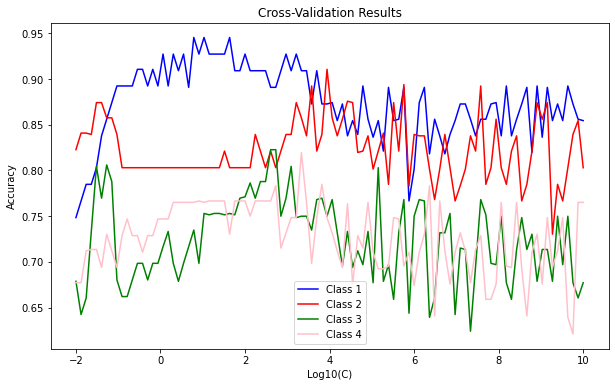

LogisticRegressionCV(Cs=[43.287612810830616], cv=5, multi_class='ovr',
                     penalty='l1', solver='liblinear')

In [33]:
#plot cross-validation results
plt.figure(figsize=(10,6))
plt.plot(np.log10(grid), np.mean(clf.scores_['Basal-like'], axis=0), color='blue', label='Class 1')
plt.plot(np.log10(grid), np.mean(clf.scores_['HER2-enriched'], axis=0), color='red', label='Class 2')
plt.plot(np.log10(grid), np.mean(clf.scores_['Luminal A'], axis=0), color='green', label='Class 3')
plt.plot(np.log10(grid), np.mean(clf.scores_['Luminal B'], axis=0), color='pink', label='Class 4')
plt.xlabel('Log10(C)')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Results')
plt.legend()
plt.show()

#select best regularization parameter
bestC = clf.C_[0]

# fit the model with selected regularization parameter
clf_final = LogisticRegressionCV(Cs=[bestC], cv=5, penalty='l1', solver='liblinear', multi_class='ovr')
clf_final.fit(X_train, y_train)

# get coefficients and export to file
# lasso_coefs = pd.DataFrame({'feature': X.columns, 'coef': clf_final.coef_.ravel()})
# lasso_coefs.to_csv('lasso.csv', index=False)
# lasso_coefs

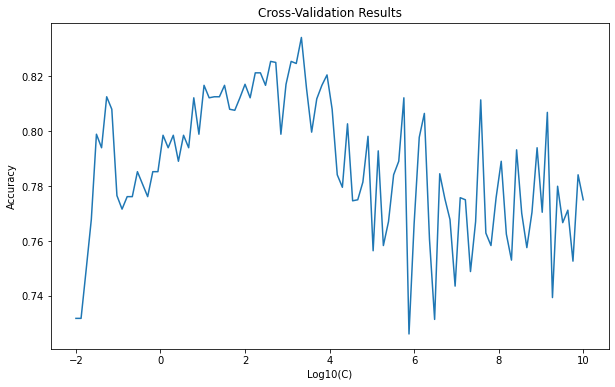

0.8340909090909092


In [35]:
plt.figure(figsize=(10,6))
means = np.mean(clf.scores_['Basal-like'] + clf.scores_['HER2-enriched'] +
        clf.scores_['Luminal A'] + clf.scores_['Luminal B'], axis=0)/4
plt.plot(np.log10(grid), means)
plt.xlabel('Log10(C)')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Results')
plt.show()
print(means.max())

In [36]:
grid[np.where(means == means.max())]

array([2154.43469003])

In [37]:
np.where(means == means.max())


(array([55], dtype=int64),)

In [ ]:
#generowanie kolumn przez rfe

In [ ]:
#from sklearn.feature_selection import RFE

#selector = RFE(estimator=clf_final, n_features_to_select=30)
#selector.fit(X_train, y_train)
#rfe_cols = selector.get_feature_names_out()


In [38]:
rfe_cols=['NP_001615', 'NP_004661', 'NP_004439', 'NP_000231', 'NP_037399',
       'NP_079197', 'NP_872330', 'NP_666533', 'NP_071414', 'NP_004453',
       'NP_000116', 'NP_055938', 'NP_002845', 'NP_004481', 'NP_789793',
       'NP_009104', 'NP_150286', 'NP_003003', 'NP_001493', 'NP_954630',
       'NP_714543', 'XP_003960183', 'NP_004336', 'NP_001819', 'NP_001351',
       'NP_006263', 'NP_055551', 'NP_065089', 'XP_003846609', 'NP_004824']

In [46]:
X_train[rfe_cols].head()

,NP_001615,NP_004661,NP_004439,NP_000231,NP_037399,NP_079197,NP_872330,NP_666533,NP_071414,NP_004453,...,NP_714543,XP_003960183,NP_004336,NP_001819,NP_001351,NP_006263,NP_055551,NP_065089,XP_003846609,NP_004824
30,-3.986900,3.085414,3.886441,-0.019421,-4.219677,1.842795,-0.392549,-4.972779,-3.706198,2.489778,...,-9.676244,-3.887627,-6.934268,-3.066061,-2.199994,0.678910,-1.717324,-3.904743,-2.973635,-4.993318
16,-3.979963,2.502191,-3.383772,-5.031842,-4.078695,-1.712918,-0.014011,-7.530528,-3.406556,-0.114215,...,-1.371152,2.973068,10.529885,4.100894,0.440205,-2.711633,3.732547,0.087047,-0.171176,-6.201439
1,-1.671382,-0.129161,-5.187379,-1.892178,1.249136,-0.647696,-5.990270,0.820927,-5.381411,-0.349957,...,8.873261,-2.631507,-9.134929,-5.899945,1.172192,11.388988,-1.099322,-2.778704,-2.735214,-0.048872
38,-3.890746,-1.297390,-3.252209,3.057545,-5.369463,-1.896718,-0.658853,-3.988767,-3.028161,-1.260982,...,-2.229990,-4.744929,-7.408301,-0.527224,-2.143171,5.432454,-3.274614,-3.907550,-1.370205,1.640441
36,-5.599854,0.538084,-4.804515,-0.022111,-0.354622,-2.836917,-1.668115,-3.559638,-0.416322,-3.227670,...,-5.451160,-0.827823,-8.428492,-3.815529,-1.339606,1.447536,-4.693859,0.935753,0.199201,0.423970


In [3]:
# Jeszcze raz te same testy tylko na mniejszej liczbie kolumn

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
import matplotlib.pyplot as plt

#load data
CDF = data_ohe

#convert target variable to factor
CDF['cancer_type'] = CDF['cancer_type'].astype('category')

#create design matrix and split into train/test sets
X = pd.get_dummies(CDF.drop('cancer_type', axis=1), drop_first=True)
y = CDF['cancer_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=420)

#setting up parameters
grid = 10 ** np.linspace(10, -2, 100)

#fit the model using cross-validation
clf = LogisticRegressionCV(Cs=grid, cv=5, penalty='l1', solver='liblinear', multi_class='ovr')
clf.fit(X_train[rfe_cols], y_train)

LogisticRegressionCV(Cs=array([1.00000000e+10, 7.56463328e+09, 5.72236766e+09, 4.32876128e+09,
       3.27454916e+09, 2.47707636e+09, 1.87381742e+09, 1.41747416e+09,
       1.07226722e+09, 8.11130831e+08, 6.13590727e+08, 4.64158883e+08,
       3.51119173e+08, 2.65608778e+08, 2.00923300e+08, 1.51991108e+08,
       1.14975700e+08, 8.69749003e+07, 6.57933225e+07, 4.97702356e+07,
       3.76493581e+07, 2.84...
       2.00923300e+00, 1.51991108e+00, 1.14975700e+00, 8.69749003e-01,
       6.57933225e-01, 4.97702356e-01, 3.76493581e-01, 2.84803587e-01,
       2.15443469e-01, 1.62975083e-01, 1.23284674e-01, 9.32603347e-02,
       7.05480231e-02, 5.33669923e-02, 4.03701726e-02, 3.05385551e-02,
       2.31012970e-02, 1.74752840e-02, 1.32194115e-02, 1.00000000e-02]),
                     cv=5, multi_class='ovr', penalty='l1', solver='liblinear')

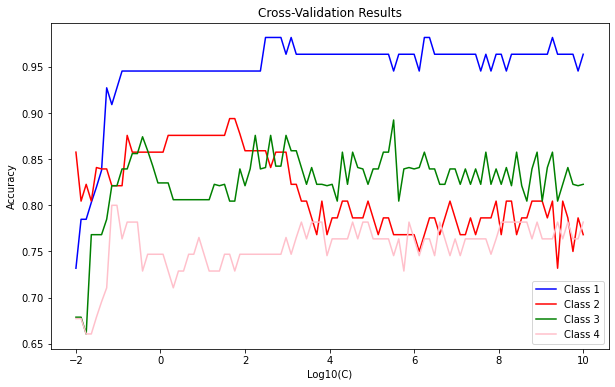

LogisticRegressionCV(Cs=[1873817422.8603868], cv=5, multi_class='ovr',
                     penalty='l1', solver='liblinear')

In [55]:
#plot cross-validation results
plt.figure(figsize=(10,6))
plt.plot(np.log10(grid), np.mean(clf.scores_['Basal-like'], axis=0), color='blue', label='Class 1')
plt.plot(np.log10(grid), np.mean(clf.scores_['HER2-enriched'], axis=0), color='red', label='Class 2')
plt.plot(np.log10(grid), np.mean(clf.scores_['Luminal A'], axis=0), color='green', label='Class 3')
plt.plot(np.log10(grid), np.mean(clf.scores_['Luminal B'], axis=0), color='pink', label='Class 4')
plt.xlabel('Log10(C)')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Results')
plt.legend()
plt.show()

#select best regularization parameter
bestC = clf.C_[0]

# fit the model with selected regularization parameter
clf_final = LogisticRegressionCV(Cs=[bestC], cv=5, penalty='l1', solver='liblinear', multi_class='ovr')
clf_final.fit(X_train[rfe_cols], y_train)

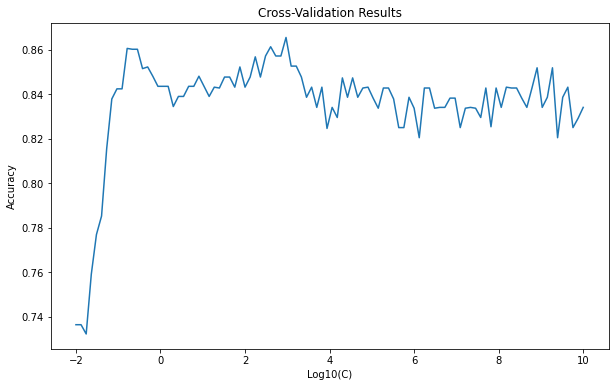

0.865530303030303


In [57]:
plt.figure(figsize=(10,6))
means = np.mean(clf.scores_['Basal-like'] + clf.scores_['HER2-enriched'] +
        clf.scores_['Luminal A'] + clf.scores_['Luminal B'], axis=0)/4
plt.plot(np.log10(grid), means)
plt.xlabel('Log10(C)')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Results')
plt.show()
print(means.max())

## k-nearest neighbours

In [238]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# load data
x = pd.get_dummies(data_ohe.drop('cancer_type', axis=1), drop_first=True)
y = data_ohe['cancer_type']

# choose which measurements to use in classification
# x = testdf.iloc[:, 1:57]

# choose which group labels to use in classification


# loop for cross-validation
for k in [3, 4, 5, 6, 7, 8]:
    
# initialize accuracy list
    accuracies_knn = []
    for i in range(300):
    # split data into train/testq sets
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)

        # makefile
        # fit KNN classifier with k=3
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)

        # predict test set labels and compute accuracy
        y_pred = knn.predict(X_test)
        acc = accuracy_score(y_test, y_pred)

        # add accuracy to list
        accuracies_knn.append(acc)
    #     compute mean accuracy and standard deviation
        mean_acc_knn = np.mean(accuracies_knn)
        std_acc_knn = np.std(accuracies_knn)

    print(f"Mean accuracy of KNN classifier with k={k}: {mean_acc_knn}")
    print(f"Standard deviation of KNN classifier with k={k}: {std_acc_knn}\n")

Mean accuracy of KNN classifier with k=4: 0.5888888888888889
Standard deviation of KNN classifier with k=4: 0.0936238863686262

Mean accuracy of KNN classifier with k=5: 0.6094444444444445
Standard deviation of KNN classifier with k=5: 0.09236434831419628

Mean accuracy of KNN classifier with k=6: 0.6005555555555556
Standard deviation of KNN classifier with k=6: 0.09099331816467231

Mean accuracy of KNN classifier with k=7: 0.6130555555555556
Standard deviation of KNN classifier with k=7: 0.08597704617591723

Mean accuracy of KNN classifier with k=8: 0.5962500000000001
Standard deviation of KNN classifier with k=8: 0.08640753192907476



In [239]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

x = pd.get_dummies(data_ohe.drop('cancer_type', axis=1), drop_first=True)
y = data_ohe['cancer_type']


# load data
testdf = data_ohe

# initialize accuracy list
accuracies_svm = []

# loop for cross-validation
for i in range(1000):
# split data into train/test sets
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)

    # makefile
    # Copy code
    # fit SVM classifier with radial basis function (RBF) kernel
    svm = SVC(kernel="rbf", probability=True)
    svm.fit(X_train, y_train)

    # predict test set labels and compute accuracy
    y_pred = svm.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    # add accuracy to list
    accuracies_svm.append(acc)
    # compute mean accuracy and standard deviation
    mean_acc_svm = np.mean(accuracies_svm)
    std_acc_svm = np.std(accuracies_svm)

print("Mean accuracy of SVM classifier with RBF kernel:", mean_acc_svm)
print("Standard deviation of SVM classifier with RBF kernel:", std_acc_svm)

Mean accuracy of SVM classifier with RBF kernel: 0.5970833333333333
Standard deviation of SVM classifier with RBF kernel: 0.09841716059712352
